In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from scipy import special, stats, optimize, integrate

from mpmath import *

from code.python.mpmath_integration import quad_phi

In [59]:
alpha = 10.005
beta = 0.0025
mu = 0.25
delta = 0.1
x = -0.5

x = -12
alpha = 1
beta = -1/2
mu = 1
delta = 10

x = -6.219899000274793
alpha = 0.24845308531407
beta = 0.1
mu = -0.3756820526459652
delta = 10.04430694917478499

x = -1.4519899000274793
alpha = 6.54845308531407
beta = 0.3
mu = 0.3756820526459652
delta = 0.4430694917478499


gamma = np.sqrt(alpha**2 - beta**2)

x -mu, gamma * delta

(-1.8276719526734446, 2.8983734730860458)

#### 1. Estimate truncation N

In [60]:
def truncation(alpha, beta, mu, delta, eps):
    gamma = np.sqrt(alpha**2 - beta**2)
    C = delta * np.exp(delta * gamma) / np.sqrt(2 * np.pi)
    u = (gamma ** 2 * eps / (2 * C)) ** (2/3)
    print(u)

    t1 = 2 * np.log(gamma)
    t2 = np.log(3) + 2/3 * (2 * np.log(gamma) + np.log(eps) - np.log(2) - np.log(delta / np.sqrt(2 * np.pi)) - delta * gamma)

    if (t1 - t2) > 705.342:
        return 1
    
    y = np.exp(t1 - t2)

    # Lambert W0
    lw = float(special.lambertw(y))
    print(lw)

    # Approximation
    la = np.log(y) ** (np.log(y) / (1 + np.log(y)))
    print(la)
    
    return int(np.ceil((3 / gamma ** 2 * lw)))

In [61]:
eps = 1.1e-16

N = truncation(alpha, beta, mu, delta, eps)
N

8.135772191423209e-11
22.764698766180008
22.93919066890856


/tmp/ipykernel_6592/3871865590.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  lw = float(special.lambertw(y))


2

In [62]:
stats.norminvgauss.cdf(x=x, a=alpha*delta, b=beta*delta, loc=mu, scale=delta)

1.1430753452803674e-06

In [63]:
quad_phi(x, alpha, beta, mu, delta, a=mp.zero, b=inf, digits=100)

mpf('1.1430753517139356e-6')

In [64]:
quad_phi(x, alpha, beta, mu, delta, a=mp.zero, b=N, digits=100)

mpf('1.1430753517139351e-6')

#### 2. Tanh-sinh integration

In [65]:
from tanh_sinh import integrate as tanh_sinh_integrate

In [66]:
def f(t):
    gamma = np.sqrt(alpha**2 - beta**2)
    integrand = special.ndtr((x-(mu + beta * t))/np.sqrt(t)) * np.exp(-delta**2/(2*t) - gamma**2/2*t) * t**(-3/2)
    C = delta * np.exp(delta * gamma) / np.sqrt(2 * np.pi)

    return C * integrand

In [68]:
val, error_estimate = tanh_sinh_integrate(f, 0, N, eps=1e-20, mode='numpy')

level: 0. j: 1
[1.6100055664406185e-10] 1
level: 1. j: 1
[1.6100055664406185e-10, 8.050027832203392e-11] 1
level: 2. j: 3
[1.6100055664406185e-10, 8.050027832203392e-11, 4.025013932581421e-11] 1.27260523375195e-11
level: 3. j: 7
[1.6100055664406185e-10, 8.050027832203392e-11, 4.025013932581421e-11, 2.433630506216305e-06] 2.43363050683019e-6
level: 4. j: 15
[1.6100055664406185e-10, 8.050027832203392e-11, 4.025013932581421e-11, 2.433630506216305e-06, 1.260983041200852e-06] 1.09011184586446e-6
level: 5. j: 31
[1.6100055664406185e-10, 8.050027832203392e-11, 4.025013932581421e-11, 2.433630506216305e-06, 1.260983041200852e-06, 1.1429133331363256e-06] 7.08350444523886e-9
level: 6. j: 63
[1.6100055664406185e-10, 8.050027832203392e-11, 4.025013932581421e-11, 2.433630506216305e-06, 1.260983041200852e-06, 1.1429133331363256e-06, 1.1430753518602595e-06] 1.46344174881482e-14
level: 7. j: 126
[1.6100055664406185e-10, 8.050027832203392e-11, 4.025013932581421e-11, 2.433630506216305e-06, 1.260983041200

In [72]:
val1, error_estimate = tanh_sinh_integrate(f, 0, 0.26285500348790075, eps=1e-20, mode='numpy')

level: 0. j: 1
[2.1318504538566314e-07] 1
level: 1. j: 1
[2.1318504538566314e-07, 1.0678575096690119e-07] 1
level: 2. j: 3
[2.1318504538566314e-07, 1.0678575096690119e-07, 2.1429198743919289e-07] 3.78232283849445e-6
level: 3. j: 7
[2.1318504538566314e-07, 1.0678575096690119e-07, 2.1429198743919289e-07, 4.275713974925376e-07] 1.40230978201494e-7
level: 4. j: 15
[2.1318504538566314e-07, 1.0678575096690119e-07, 2.1429198743919289e-07, 4.275713974925376e-07, 4.4235729092788734e-07] 5.8758473719099e-10
level: 5. j: 31
[2.1318504538566314e-07, 1.0678575096690119e-07, 2.1429198743919289e-07, 4.275713974925376e-07, 4.4235729092788734e-07, 4.424404680090252e-07] 1.04633726646449e-13
level: 6. j: 63
[2.1318504538566314e-07, 1.0678575096690119e-07, 2.1429198743919289e-07, 4.275713974925376e-07, 4.4235729092788734e-07, 4.424404680090252e-07, 4.4244046281287276e-07] 5.72546261554856e-21


In [73]:
val2, error_estimate = tanh_sinh_integrate(f, 0.26285500348790075, N, eps=1e-20, mode='numpy')

level: 0. j: 1
[8.80765250800475e-12] 1
level: 1. j: 1
[8.80765250800475e-12, 1.2814026394144108e-09] 1
level: 2. j: 3
[8.80765250800475e-12, 1.2814026394144108e-09, 9.651218876557928e-07] 9.62569447079711e-7
level: 3. j: 7
[8.80765250800475e-12, 1.2814026394144108e-09, 9.651218876557928e-07, 6.241311931945393e-07] 1.81999607044702e-7
level: 4. j: 15
[8.80765250800475e-12, 1.2814026394144108e-09, 9.651218876557928e-07, 6.241311931945393e-07, 7.008734807359601e-07] 2.01475513469726e-8
level: 5. j: 31
[8.80765250800475e-12, 1.2814026394144108e-09, 9.651218876557928e-07, 6.241311931945393e-07, 7.008734807359601e-07, 7.006348897851538e-07] 9.75262516775886e-14
level: 6. j: 63
[8.80765250800475e-12, 1.2814026394144108e-09, 9.651218876557928e-07, 6.241311931945393e-07, 7.008734807359601e-07, 7.006348897851538e-07, 7.006348889010624e-07] 2.81721294442042e-24


In [74]:
val, val1 + val2

(1.1430753517139357e-06, 1.143075351713935e-06)

In [82]:
%%timeit
quad_phi(x, alpha, beta, mu, delta, a=mp.zero, b=N, digits=100) 

961 ms ± 30.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [83]:
%%timeit
quad_phi(x, alpha, beta, mu, delta, a=mp.zero, b=0.26285500348790075, digits=100) + quad_phi(x, alpha, beta, mu, delta, a=0.26285500348790075, b=N, digits=100)

763 ms ± 12.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


##### 2.1. Order of magnitude

In [27]:
xx = np.linspace(1e-15, N, 100000)
f = special.ndtr((x-(mu + beta*xx))/np.sqrt(xx)) * np.exp(-delta**2/(2*xx) - gamma**2/2*xx) * xx**(-3/2)

xx[np.argmax(f)]

0.34224342243422534

In [14]:
t = 0.001
z = (x-(mu + beta * t))/np.sqrt(t)
stats.norm.pdf(z) / special.ndtr(z), np.sqrt(2 / np.pi) - 2 / np.pi * z, -z

(26.220854523678174, 17.466354969870107, 26.182772091852247)

In [15]:
z = 1.5

stats.norm.pdf(z) / special.ndtr(z), -stats.norm.pdf(z) / special.ndtr(z) * (z + 1/special.ndtr(z)), np.sqrt(2/np.pi) - 2*z/np.pi, stats.norm.pdf(z)

(0.13878975045885078,
 -0.3569103237943509,
 -0.1570450977485066,
 0.12951759566589174)

In [16]:
def fa(t):
    z = (x-(mu + beta * 1))/np.sqrt(1)
    T = np.sqrt(2 / np.pi) - 2 / np.pi * z
    return delta ** 2 / (2*t**2) - 3/(2*t) -1/2*(alpha ** 2 + (x-mu)** 2 - 2 * beta ** 2)

sol = optimize.root_scalar(fa, method='bisect', bracket=[1e-6, 20], xtol=1e-4)
sol

      converged: True
           flag: converged
 function_calls: 20
     iterations: 18
           root: 0.0643167926826477

In [17]:
(alpha ** 2  - 2 * beta ** 2)

0.12080078679052253

In [18]:
(-3/2 + np.sqrt(9/4 + (delta ** 2) * (alpha ** 2 + (x-mu)** 2 - 2 * beta ** 2))) / (alpha ** 2 + (x-mu)** 2 - 2 * beta ** 2)

0.06432539920385714

In [19]:
t0 = (-3/2 + np.sqrt(9/4 + (delta**2 + (x-mu)**2) * alpha ** 2)) / alpha**2
t0

0.2856050159532921

Simple

In [20]:
t0 = delta / alpha
t0

0.8078530390509654

Estimate $\gamma$ and $\delta$ both large, and $\beta$ and $x-\mu$ fixed.

In [21]:
gamma, delta

(0.4591304681574972, 0.4430694917478499)

In [22]:
t0 = -3/2 + np.sqrt(9/4 + (gamma * delta) ** 2) / gamma ** 2
t0

5.680861678825599

Case $x - \mu < 0$ and $\beta \to 0$

In [23]:
omega = np.sqrt((x-mu)**2 + delta ** 2)
t0 = -3/2 + np.sqrt(9/4 + (gamma * omega) ** 2) / gamma ** 2
t0

5.90368028596708

Case $x - \mu < 0$ and $\beta < 0$

In [24]:
x-mu, beta

(-0.8276719526734445, 0.3)

In [25]:
h = (beta * (x-mu) - 3) / 2
t0 = (h + np.sqrt(h ** 2 + (delta * omega) ** 2)) / gamma ** 2
t0

0.2486634153491604

In [28]:
def g(t):
    z = (x-mu)/np.sqrt(t) - beta*np.sqrt(t)
    t1 = -0.5 * (delta ** 2 / t + gamma**2*t)
    t2 = - 3/2*np.log(t)
    t3 = np.log(special.ndtr(z))
    # print(z, t1, t2, t3)
    return t1 + t2 + t3

def gp(t):
    z = (x-(mu + beta * t))/np.sqrt(t)
    return delta ** 2 / (2*t**2) - gamma**2/2 - 3/(2*t) -1/2*((x-mu)/t**(3/2) +beta/np.sqrt(t)) * stats.norm.pdf(z) / special.ndtr(z)

sol = optimize.root_scalar(gp, x0=delta/alpha, xtol=1e-4)

max_f = np.exp(g(sol.root))
max_f, sol

/tmp/ipykernel_6592/3495162056.py:11: RuntimeWarning: invalid value encountered in scalar divide
  return delta ** 2 / (2*t**2) - gamma**2/2 - 3/(2*t) -1/2*((x-mu)/t**(3/2) +beta/np.sqrt(t)) * stats.norm.pdf(z) / special.ndtr(z)
/tmp/ipykernel_6592/3495162056.py:11: RuntimeWarning: invalid value encountered in divide
  return delta ** 2 / (2*t**2) - gamma**2/2 - 3/(2*t) -1/2*((x-mu)/t**(3/2) +beta/np.sqrt(t)) * stats.norm.pdf(z) / special.ndtr(z)


(nan,
       converged: False
            flag: convergence error
  function_calls: 100
      iterations: 50
            root: nan)

In [29]:
def gp_deriv(t):
    z = (x-(mu + beta * t))/np.sqrt(t)
    
    # Function
    A = 1/2*((x-mu)/t**(3/2) +beta/np.sqrt(t))
    B = stats.norm.pdf(z) / special.ndtr(z)

    f = delta ** 2 / (2*t**2) - gamma**2/2 - 3/(2*t) -A * B

    # Derivative
    d1 = -1/2 * (beta / t ** (3/2) - 3/2 * (x - mu + beta * t)/t ** (5/2)) * B
    d2 = -z * A ** 2 * B
    d3 = -B ** 2 * A ** 2

    deriv = -delta ** 2 / t ** 3 + 3/2/t**2 + d1 + d2 + d3

    return f, deriv

# gp_deriv(t0), gp(t0), (gp(t0 + 1e-5) - gp(t0 - 1e-5)) / 2e-5

In [30]:
sol = optimize.root_scalar(gp_deriv, x0=t0, fprime=True, method='newton', xtol=1e-4)
sol

      converged: True
           flag: converged
 function_calls: 5
     iterations: 5
           root: 0.3421955460060159

In [31]:
sol = optimize.root_scalar(gp, x0=t0, method='bisect', bracket=[1e-6, delta * 2], xtol=1e-4)
sol

max_f = np.exp(g(sol.root))
max_f, sol

/tmp/ipykernel_6592/3495162056.py:11: RuntimeWarning: invalid value encountered in scalar divide
  return delta ** 2 / (2*t**2) - gamma**2/2 - 3/(2*t) -1/2*((x-mu)/t**(3/2) +beta/np.sqrt(t)) * stats.norm.pdf(z) / special.ndtr(z)
/tmp/ipykernel_6592/3495162056.py:5: RuntimeWarning: divide by zero encountered in log
  t3 = np.log(special.ndtr(z))


(0.0,
       converged: False
            flag: The function value at x=1e-06 is NaN; solver cannot continue.
  function_calls: 1
      iterations: nan
            root: 1e-06)

In [47]:
t0

0.16270847787840106

In [48]:
alpha / delta, delta, alpha ** 2 - 2 * beta ** 2 , (x-mu)**2

(63.304862121439854, 0.4430694917478499, 786.7157204790643, 21.11936521396427)

In [67]:
def max_contribution(tol=1e-4):
    # check_1 = (alpha / delta < 0.5) and (delta > 2)
    # check_2 = alpha ** 2 + (x -mu) ** 2 < 2 * beta ** 2 
    # check_3 = (x-mu)**2 > 1
    
    # if check_1 or check_2:
    #     x0_type = 'asymptotic'
    #     x0 = (-3/2 + np.sqrt(9/4 + (delta**2 + (x-mu)**2) * alpha ** 2)) / alpha**2
    # else:
    #     x0_type = 'small'
    #     x0 = (-3/2 + np.sqrt(9/4 + (delta ** 2) * (alpha ** 2 + (x-mu)** 2 - 2 * beta ** 2))) / (alpha ** 2 + (x-mu)** 2 - 2 * beta ** 2)

    if (x - mu) < 0:
        x0_type = 'negative'
        x0 = (-3/2 + np.sqrt(9/4 + (delta**2 + (x-mu)**2) * alpha ** 2)) / alpha**2
    else:
        x0_type = 'positive'
        x0 = (-3/2 + np.sqrt(9/4 + (gamma * delta) ** 2)) / gamma ** 2
    
    
    print(f'init {x0_type}', x0)

    maxiter = 10
    for k in range(maxiter):
        fx, fxp = gp_deriv(x0)
        x0 -= fx / fxp

        err = abs(fx)
        print(k, err, x0)
        if err < tol:
            break

    max_f = delta / np.sqrt(2 * np.pi) * np.exp(g(x0) + delta * gamma)
    print(g(x0))

    return max_f, x0

max_f, root = max_contribution()
max_f

init negative 0.2543268337653374
0 1.615098529210961 0.2624335724129212
1 0.07603193588232315 0.26285396211471856
2 0.00018741472865357878 0.2628550034815383
3 1.1450396186774014e-09 0.26285500348790075
-13.202152783852256


5.922531993143176e-06

In [33]:
def max_contribution_bisection(tol=1e-4):
    a = 1e-6
    b = delta * 2

    maxiter = 20
    for k in range(maxiter):
        c = (a + b) / 2
        fc, _ = gp_deriv(c)
        
        if fc == 0 or (b - a) / 2 < tol:
            break

        fa, _ = gp_deriv(a)
        if np.sign(fc) == np.sign(fa):
            a = c
        else:
            b = c
        print(k, fc, c)

    max_f = delta / np.sqrt(2 * np.pi) * np.exp(g(c) + delta * gamma)
    print(g(c))

    return max_f, c

max_f, root = max_contribution_bisection()
max_f

0 -0.7642108200124826 0.4430699917478499
1 3.4630222949192984 0.22153549587392493
2 25.619956704268535 0.11076824793696247
3 124.09703270653377 0.055384623968481234
4 536.8213263151287 0.027692811984240617
5 2224.301729001303 0.01384690599212031
6 9045.703099392136 0.006923952996060154
7 36466.716335757315 0.003462476498030077
8 146365.5301259313 0.0017317382490150387
9 585945.2926607897 0.0008663691245075193
10 nan 0.00043368456225375965
11 nan 0.00021734228112687984
12 nan 0.00010917114056343992
-inf


/tmp/ipykernel_6592/12370538.py:6: RuntimeWarning: invalid value encountered in scalar divide
  B = stats.norm.pdf(z) / special.ndtr(z)
/tmp/ipykernel_6592/3495162056.py:5: RuntimeWarning: divide by zero encountered in log
  t3 = np.log(special.ndtr(z))


0.0

In [42]:
max_f, max_f / 2**53, 2**(-53), root

(97.45514918282856,
 1.0819695049105578e-14,
 1.1102230246251565e-16,
 0.014004565954889168)

In [43]:
eps = 2**(-53)

N = truncation(alpha, beta, mu, delta, eps * max_f)
N

2.1036611499777858e-11
26.86325220314536
27.030880737985125


/tmp/ipykernel_5466/3871865590.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  lw = float(special.lambertw(y))


1

In [44]:
truncation(alpha, beta, mu, delta, eps), truncation(alpha, beta, mu, delta, eps * max_f)

9.933583028704972e-13
29.812027715851094
29.974883290301424
2.1036611499777858e-11
26.86325220314536
27.030880737985125


/tmp/ipykernel_5466/3871865590.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  lw = float(special.lambertw(y))


(1, 1)

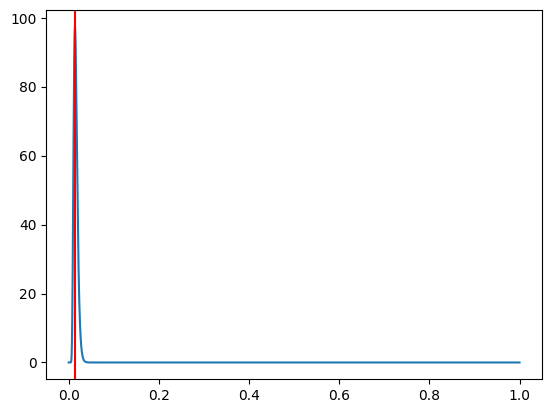

In [45]:
C = delta / np.sqrt(2 * np.pi) * np.exp(delta * gamma)
plt.plot(xx, C * f)
plt.axvline(root, color='r')
# plt.xlim(-0.01, 0.01)
plt.show()

In [84]:
from nig_integration import nig_integration

In [85]:
def f(t):
    gamma = np.sqrt(alpha**2 - beta**2)
    integrand = special.ndtr((x-mu - beta * t)/np.sqrt(t)) * np.exp(-(delta - gamma * t)**2 / 2 / t) * t**(-3/2)
    # C = delta/ np.sqrt(2 * np.pi)

    return integrand

In [86]:
N

2

In [95]:

# quad_phi(x, alpha, beta, mu, delta, a=mp.zero, b=0.26285500348790075, digits=100) 
quad_phi(x, alpha, beta, mu, delta, a=mp.zero, b=0.26285500348790075, digits=100) 

mpf('4.4244046281287307e-7')

In [96]:
nig_integration(f, 0.26285500348790075, 1e-15, max_steps=10)

h=3.871859339789319
lambert  -75.44787685668081

level: 0. j: 1
[1.1275184458590666e-06]
lambert  -74.74537496806168

level: 1. j: 1
[1.1275184458590666e-06, 5.682063756563948e-07]
lambert  -74.0427835324627

level: 2. j: 3
[1.1275184458590666e-06, 5.682063756563948e-07, 1.3852934458698223e-06]
lambert  -73.3401008070815

level: 3. j: 7
[1.1275184458590666e-06, 5.682063756563948e-07, 1.3852934458698223e-06, 2.4493454757293507e-06]
lambert  -72.6373249975023

level: 4. j: 15
[1.1275184458590666e-06, 5.682063756563948e-07, 1.3852934458698223e-06, 2.4493454757293507e-06, 2.502785192924332e-06]
lambert  -71.93445425563057

level: 5. j: 31
[1.1275184458590666e-06, 5.682063756563948e-07, 1.3852934458698223e-06, 2.4493454757293507e-06, 2.502785192924332e-06, 2.5030695986097103e-06]
lambert  -71.23148667752294

level: 6. j: 63
[1.1275184458590666e-06, 5.682063756563948e-07, 1.3852934458698223e-06, 2.4493454757293507e-06, 2.502785192924332e-06, 2.5030695986097103e-06, 2.503069596492828e-06]
lam

2.5030695964928275e-06

In [97]:
float(quad_phi(x, alpha, beta, mu, delta, a=mp.zero, b=N, digits=100))

1.143075351713935e-06

In [ ]:
eps = 1e-15
h = 0.5
z = -(eps ** 2) / h / 2
np.log(-2 / np.pi * special.lambertw(z, -1).real) / h,  special.lambertw(z, -1).real

In [ ]:
a = 0.3205
np.log(-z) - 2 / a * (1 - 1 / (1 + a * sqrt(-0.5*(1 + np.log(-z)))))

In [ ]:
u = -2 * np.log(eps) + np.log(2 * h) - 1
special.lambertw(-np.exp(-u-1), -1), -1 - np.sqrt(2 * u) - 2/3*u

In [ ]:
np.pi / 2

In [106]:
max_f = 2

n = 128
rho = 1.2
64 * max_f / (15 * (rho - 1) * rho**(2*n - 1))

2.7470778856051737e-19